In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jjoo = pd.read_csv("athlete_events.csv")
jjoo

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Identificación y tratamiento de valores nulos

In [4]:
jjoo.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
#Para tratar los nulos de los medallas, simplement asigno No Medal ("NoM") en lugar de NaN
jjoo["Medal"] = jjoo["Medal"].fillna("NoM")

In [6]:
#Para los nulos de edad, altura y peso, sustuiremos la mediana por sexo, ya que son variables secundarias.

jjoo["Height"] = jjoo.groupby(["Sex"])['Height'].transform(lambda x: x.fillna(x.median()))
jjoo["Age"] = jjoo.groupby(["Sex"])['Age'].transform(lambda x: x.fillna(x.median()))
jjoo["Weight"] = jjoo.groupby(["Sex"])['Weight'].transform(lambda x: x.fillna(x.median()))

In [7]:
jjoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


## Analizando y recodificando columnas

In [8]:
#Consultando las columnas observamos que para cada NOC (Comíté Olímpico Nacional) le corresponden diferentes equipos. Vamos a analizarlos bien, para que así a cada atleta le coresponda simplemente el nombre de su país
jjoo.groupby("NOC")["Team"].nunique().sort_values(ascending=False).head(10)

NOC
FRA    160
USA     97
GBR     96
SWE     52
NOR     46
GER     43
ITA     36
CAN     32
DEN     29
GRE     29
Name: Team, dtype: int64

In [9]:
# Efectivamente para cada NOC le corresponden diferentes equipos. Vamos a utilizar el otro dataset de la entrada principal, que relaciona NOCs con países 

In [10]:
noc = pd.read_csv('noc_regions.csv')
noc = noc.drop("notes", axis = 1)
noc = noc.rename(columns = {"region": "Country"})

In [11]:
noc

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra
...,...,...
225,YEM,Yemen
226,YMD,Yemen
227,YUG,Serbia
228,ZAM,Zambia


In [12]:
#Uno los dos datasets a través de la columna NOC para que aparezca la columna Country en nuestro dataset principal
#El join es left porque queremos todos los países participantes, tengan NOC o no asociado

jjoo_merge = jjoo.merge(noc, left_on = "NOC", right_on = "NOC", how = "left")

In [13]:
#Por consenso colectivo, nos vamos a quedar con los eventos de verano
jjoo = jjoo_merge[jjoo_merge["Season"] == "Summer"]

In [14]:
#Comprobamos si hay NOC/Equipos que no tiene país asignado
jjoo_merge.loc[jjoo_merge['Country'].isnull(),['NOC', 'Team']].drop_duplicates()

,NOC,Team
578,SGP,Singapore
6267,ROT,Refugee Olympic Athletes
44376,SGP,June Climene
61080,UNK,Unknown
64674,TUV,Tuvalu
80986,SGP,Rika II
108582,SGP,Singapore-2
235895,SGP,Singapore-1


In [15]:
#Les asigno país manualmente

jjoo.loc[jjoo['NOC']=='SGP', "Country"] = "Singapore"
jjoo.loc[jjoo['NOC']=='ROT', "Country"] = "Refugee Olympic Athletes"
jjoo.loc[jjoo['NOC']=='UNK', "Country"] = "Unknown"
jjoo.loc[jjoo['NOC']=='TUV', "Country"] = "Tuvalu"

In [16]:
#Elimamos la columna de Team, para quedarnos con Country
jjoo = jjoo.drop(["Team"], axis = 1)

## Análisis exploratorio

In [17]:
#Vamos a explorar qué países tienen más medallas.
#Para simplificarnos la vida, vamos a hacer una columna que indique si el atleta tiene o medalla o no, independientemente del metal

jjoo["Has_Medal"] = "0"
jjoo.loc[jjoo["Medal"] != "NoM", "Has_Medal"] = 1

In [18]:
#Podemos comprovar que las medallas estan asignadas por atletas. Como en los medalleros se cuenta 1 medalla por deporte de equipo, primero tenemos que encontrar los deportes de equipo y asignarles solo una medalla.
jjoo.loc[(jjoo.Sport == "Handball") & (jjoo["Medal"] == "Gold") & (jjoo.Year == 2016) & (jjoo.Sex == "M")]

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,Has_Medal
41295,21299,Mads Christiansen,M,30.0,197.0,93.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90256,45732,Henrik Toft Hansen,M,29.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90337,45782,Mikkel Hansen,M,28.0,196.0,98.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
90361,45793,Ren Toft Hansen,M,31.0,200.0,105.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
107590,54379,Henrik Mllgaard Jensen,M,31.0,197.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
126854,63955,Jannick Green Krejberg,M,27.0,195.0,95.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
131775,66315,Niklas Landin Jacobsen,M,27.0,201.0,102.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
132743,66820,Mads Mensah Larsen,M,24.0,188.0,106.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
164022,82327,Casper Ulrich Mortensen,M,26.0,190.0,88.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1
171165,86018,Michael Damgaard Nielsen,M,26.0,192.0,92.0,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Gold,Denmark,1


In [19]:
#Suma medallas por evento
medal_sum = jjoo.groupby(["Country","Year","Event","Medal"], as_index = False)["Has_Medal"].sum()

#Contar solo las medallas de oro (dando por supuesto que en los eventos de equipo también habrá múltiples de otro metal)
gold_medals = medal_sum[medal_sum['Medal'] == 'Gold']

#Buscar eventos con múltiples medallas de oro (por equipo o por múltiple premio)
identify_team_events = gold_medals[gold_medals['Has_Medal'] > 1]


In [20]:
identify_team_events

,Country,Year,Event,Medal,Has_Medal
824,Argentina,1924,Polo Men's Polo,Gold,5
930,Argentina,1936,Polo Men's Polo,Gold,4
1091,Argentina,1952,Rowing Men's Double Sculls,Gold,2
1858,Argentina,2004,Basketball Men's Basketball,Gold,12
1871,Argentina,2004,Football Men's Football,Gold,16
...,...,...,...,...,...
101892,Ukraine,2008,"Fencing Women's Sabre, Team",Gold,4
102113,Ukraine,2012,Rowing Women's Quadruple Sculls,Gold,4
102422,Uruguay,1924,Football Men's Football,Gold,14
102423,Uruguay,1928,Football Men's Football,Gold,17


In [21]:
# Si un evento coincide con un deporte de equipo, entonces es un evento de equipo. Los otros son eventos individuales.
team_event = []
single_event = []

for event in jjoo["Event"]:
    if event is identify_team_events:
        team_event.append(True)
        single_event.append(False)
    else:
        team_event.append(False)
        single_event.append(True)

# Filas en que hay 1 oro
medal = jjoo['Has_Medal'] == 1

# Inicializar columnas
jjoo['Team_Event'] = 0
jjoo['Single_Event'] = 0

#Asignar 1 a eventos de equipo con medalla
jjoo.loc[team_event & medal, "Team_Event"] = 1

#Categoría final
jjoo['Event_Category'] = jjoo['Single_Event'] + jjoo['Team_Event']

C:\Users\lupep\AppData\Local\Temp\ipykernel_14908\1550428214.py:21: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  jjoo.loc[team_event & medal, "Team_Event"] = 1


In [22]:
#Ahora contamos una medalla por evento, o sea que tenemos que dividir el número de medallas por el total de miembros del equipo ganador.
#Se filtran columnas con medalla, se agrupan columnas de interés, se agregan cuántos atletas ganaros esta medalla y max devuelve si al menos uno es evento de equipo

medals_tally = jjoo[jjoo["Has_Medal"] == 1].groupby(["Year", "Country", "Event", "Medal"]).agg(atletas=("Has_Medal","sum"),Team_Event=("Team_Event","max")).reset_index()
medals_tally['Medal_corrected'] = 1
medals_tally

,Year,Country,Event,Medal,atletas,Team_Event,Medal_corrected
0,1896,Australia,"Athletics Men's 1,500 metres",Gold,1,0,1
1,1896,Australia,Athletics Men's 800 metres,Gold,1,0,1
2,1896,Australia,Tennis Men's Doubles,Bronze,1,0,1
3,1896,Austria,"Cycling Men's 10,000 metres",Bronze,1,0,1
4,1896,Austria,Cycling Men's 12-Hours Race,Gold,1,0,1
...,...,...,...,...,...,...,...
16047,2016,Venezuela,Athletics Women's Triple Jump,Silver,1,0,1
16048,2016,Venezuela,Boxing Men's Flyweight,Bronze,1,0,1
16049,2016,Venezuela,Cycling Women's BMX,Bronze,1,0,1
16050,2016,Vietnam,"Shooting Men's Air Pistol, 10 metres",Gold,1,0,1


In [23]:
#Finalmente podemos sumar las medallas por país y filtrar el top 10
medals_total = medals_tally.groupby(["Country"])["Medal_corrected"].sum()

medals_top = medals_total.sort_values(ascending=False).iloc[0:10]

In [24]:
medals_top

Country
USA          2544
Russia       1577
Germany      1389
UK            892
France        770
Italy         608
China         545
Australia     518
Sweden        513
Hungary       504
Name: Medal_corrected, dtype: int64

In [25]:
#Para graficar la evolución temporal del medallero, seleccionamos los país que nos interesan
top_countries = ["USA","Russia","Germany","UK","France","Italy","China"]

#Unstack nos permite separar los países por columnas y asignarles las medallas por año
year_country = medals_tally.groupby(["Year","Country"])["Medal_corrected"].sum().unstack(fill_value=0)

#Filtramos sólo los países seleciconados
year_country = year_country.loc[:, top_countries]

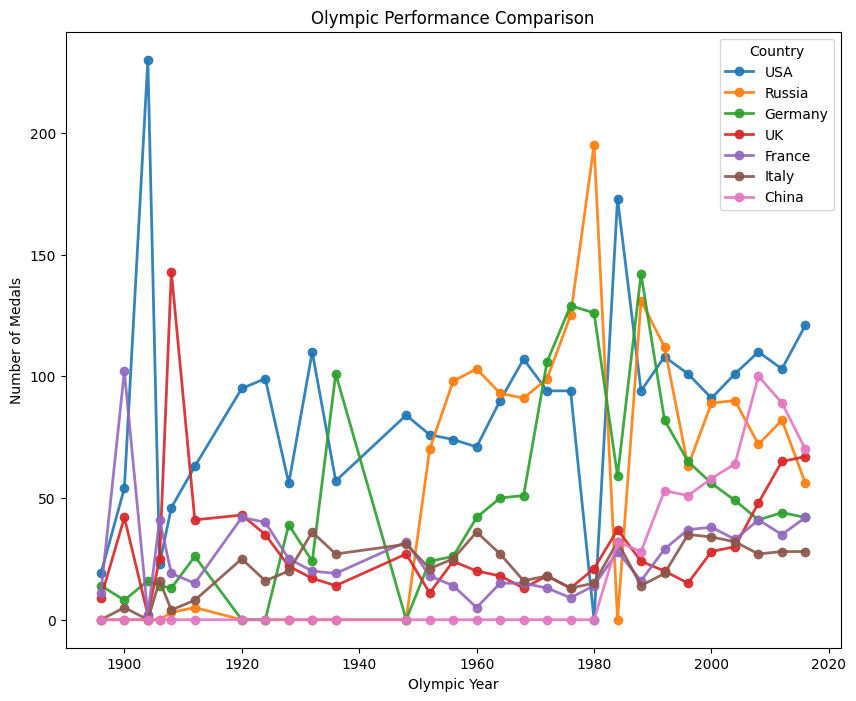

In [26]:
year_country.plot(linestyle = '-', marker = 'o', alpha = 0.9, figsize = (10,8), linewidth = 2)
plt.xlabel('Olympic Year')
plt.ylabel('Number of Medals')
plt.title('Olympic Performance Comparison');

In [27]:
jjoo.to_csv("jjoo_limpio.csv", index=False)